In [1]:
### Run this cell before continuing.
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)
source("tests.R")
source('cleanup.R')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

ERROR: Error in file(filename, "r", encoding = encoding): cannot open the connection


In [2]:
cleveland <- read_csv("processed.cleveland.data")
cleveland

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): major_vessels, thal
dbl (12): age, sex, chest_pain, rest_bp, chol, fast_bp, rest_ecg, max_hr, ex...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,chest_pain,rest_bp,chol,fast_bp,rest_ecg,max_hr,exer_angina,oldpeak,slope,major_vessels,thal,diagnose
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
38,1,3,138,175,0,0,173,0,0.0,1,?,3.0,0


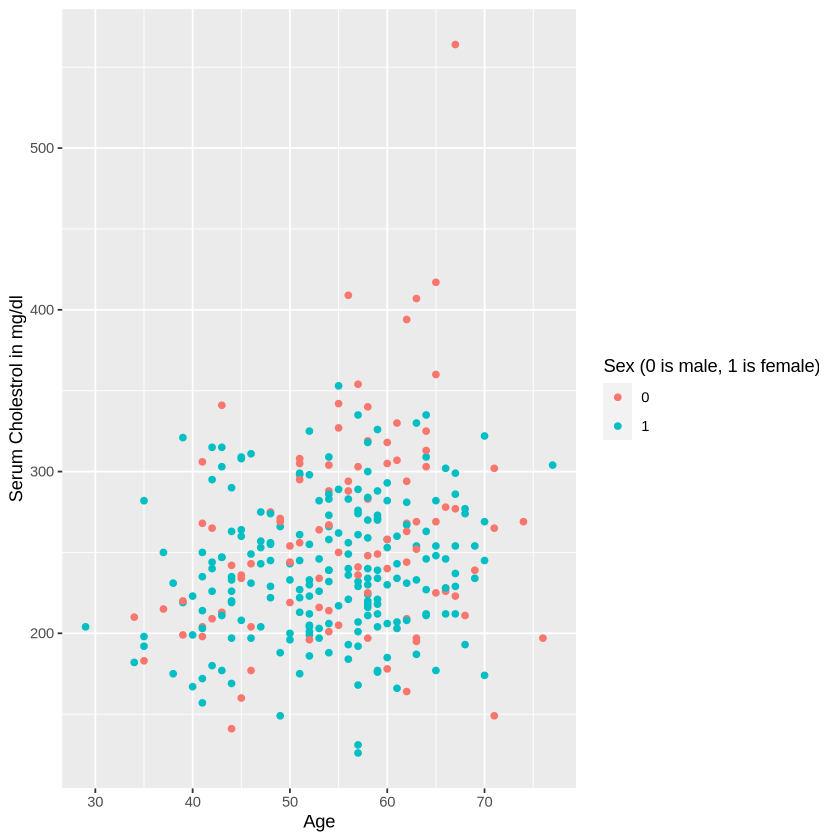

In [3]:
age_chol_plot <- cleveland |>
ggplot(aes(x = age, y = chol, fill = as_factor(sex))) +
geom_point(aes(color = as_factor(sex))) +
labs(x = "Age", y = "Serum Cholestrol in mg/dl", color = "Sex (0 is male, 1 is female)") +
guides(fill = "none")
age_chol_plot

In [4]:
#There is a very weak relationship between chol and age, but not really anything between the two and sex

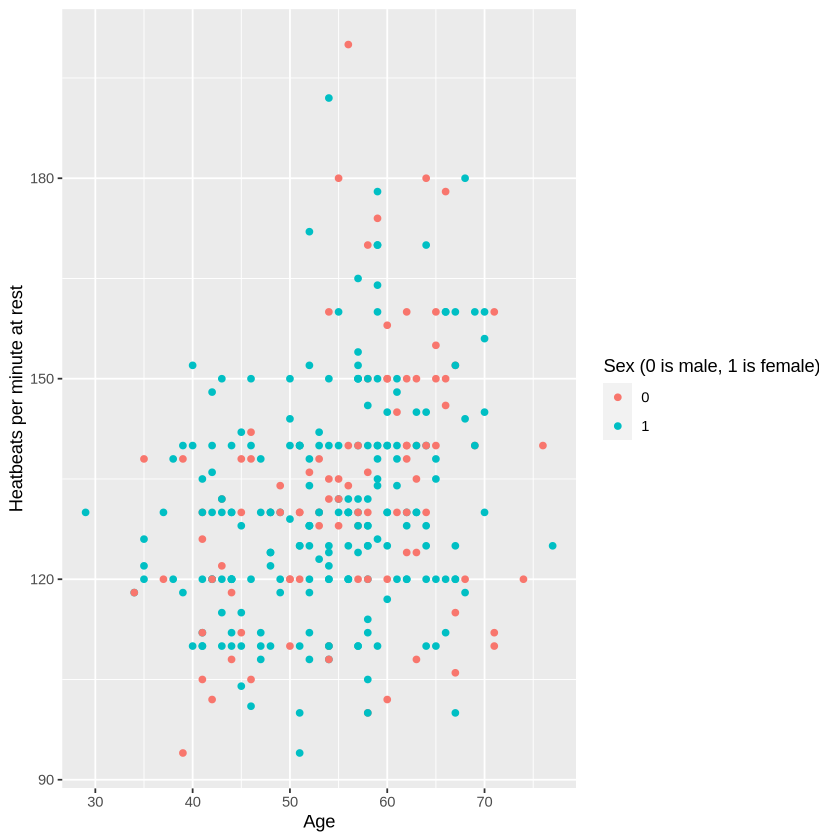

In [5]:
age_rest_bp_plot <- cleveland |>
ggplot(aes(x = age, y = rest_bp, fill = as_factor(sex))) +
geom_point(aes(color = as_factor(sex))) +
labs(x = "Age", y = "Heatbeats per minute at rest", color = "Sex (0 is male, 1 is female)") +
guides(fill = "none")
age_rest_bp_plot

In [6]:
#Again, there is no clear relationship between age, sex, and resting heartrate

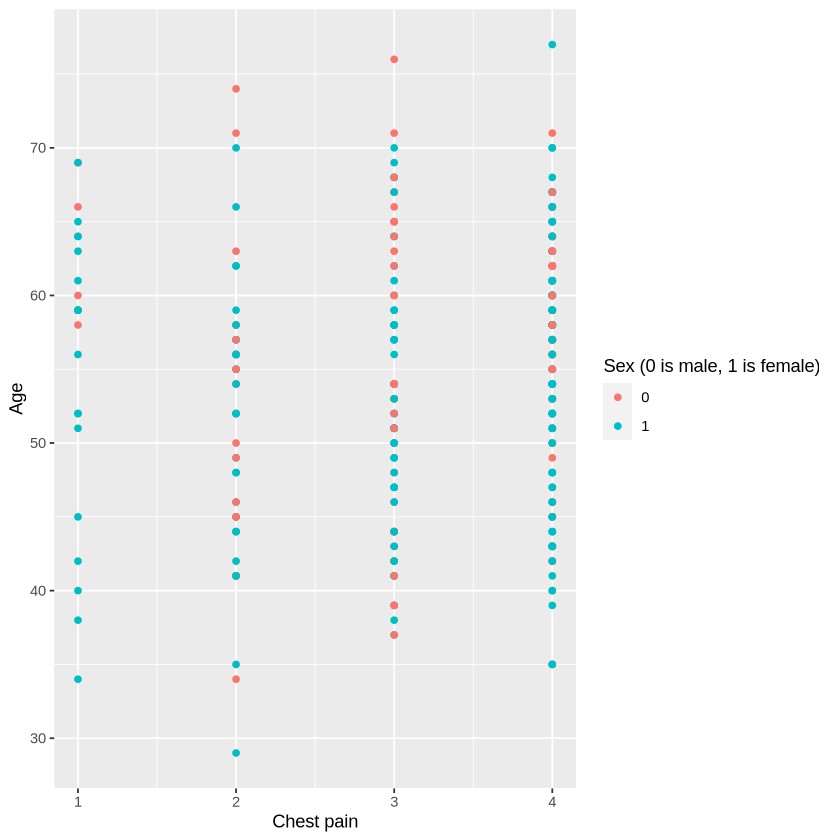

In [7]:
age_chest_pain_plot <- cleveland |>
ggplot(aes(x = chest_pain, y = age, fill = as_factor(sex))) +
geom_point(aes(color = as_factor(sex))) +
labs(x = "Chest pain", y = "Age", color = "Sex (0 is male, 1 is female)") +
guides(fill = "none")     
age_chest_pain_plot

In [8]:
chest_pain_4_count <- cleveland |>
filter(chest_pain == 4) |>
count()
chest_pain_4_count
#There are more people with chest pain type 4 than any other type

n
<int>
144


In [9]:
chest_pain_4 <- cleveland |>
filter(chest_pain == 4)
chest_pain_4

age,sex,chest_pain,rest_bp,chol,fast_bp,rest_ecg,max_hr,exer_angina,oldpeak,slope,major_vessels,thal,diagnose
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,3
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,0,4,140,241,0,0,123,1,0.2,2,0.0,7.0,1
68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3


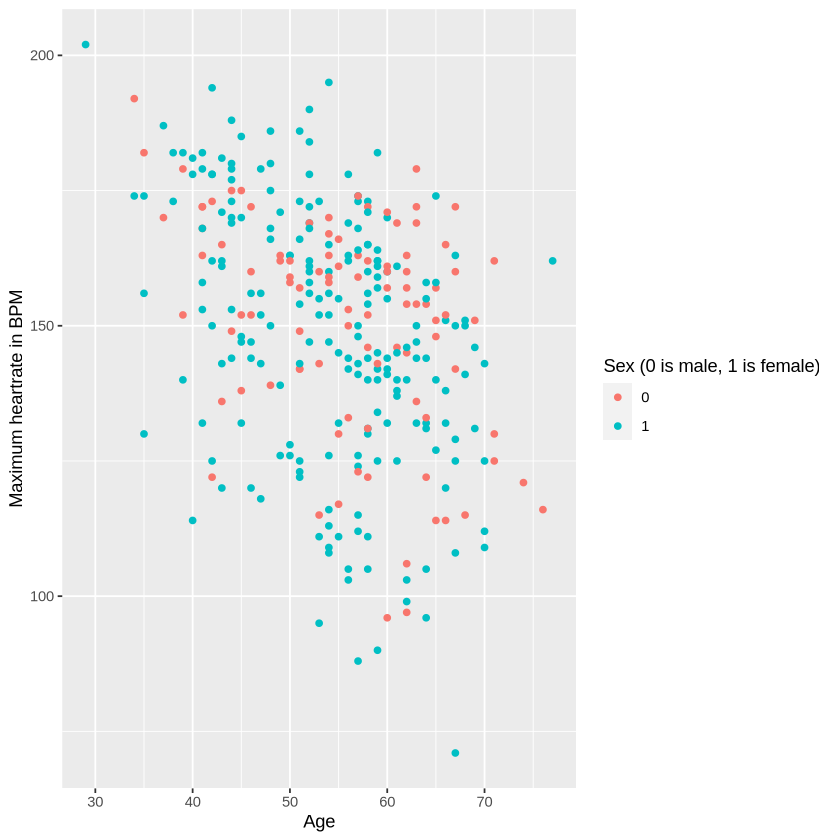

In [10]:
age_max_hr_plot <- cleveland |>
ggplot(aes(x = age, y = max_hr, fill = as_factor(sex))) +
geom_point(aes(color = as_factor(sex))) +
labs(x = "Age", y = "Maximum heartrate in BPM", color = "Sex (0 is male, 1 is female)") +
guides(fill = "none")
age_max_hr_plot

In [11]:
#There is a downward/negative trend in max heartrate as age increases. Sex likely isn't a factor. 

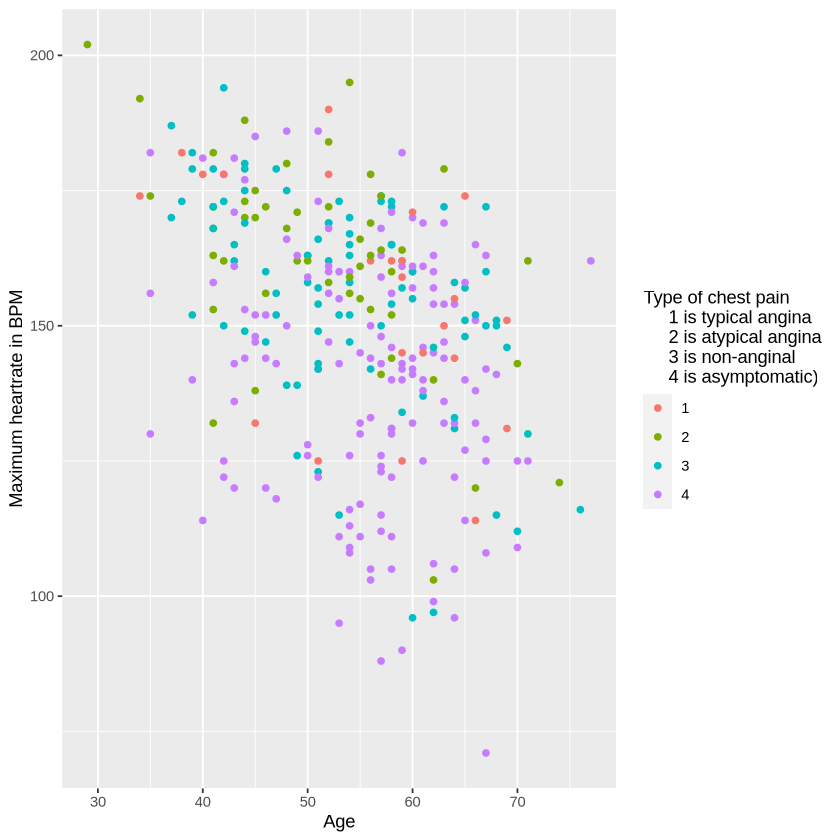

In [12]:
age_max_hr_chest_pain_plot <- cleveland |>
ggplot(aes(x = age, y = max_hr, fill = as_factor(chest_pain))) +
geom_point(aes(color = as_factor(chest_pain))) +
labs(x = "Age", y = "Maximum heartrate in BPM", color = "Type of chest pain 
     1 is typical angina 
     2 is atypical angina
     3 is non-anginal
     4 is asymptomatic)") +
guides(fill = "none")
age_max_hr_chest_pain_plot

In [13]:
#When looking at the type of chest pain, there is no clear distinction between any of them

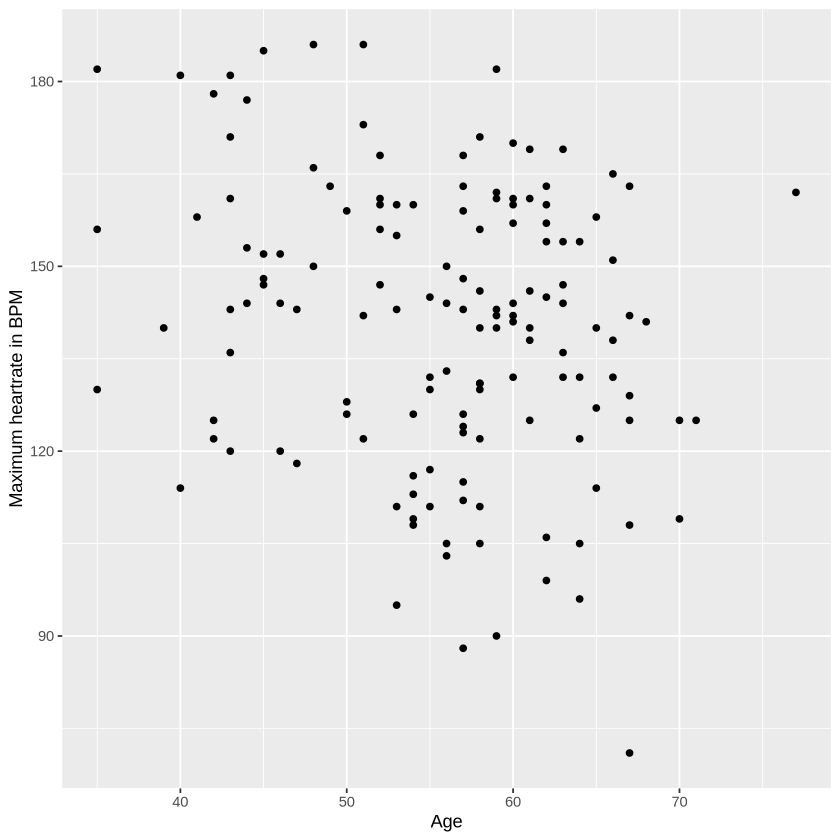

In [14]:
age_max_hr_chest_pain_4_plot <- chest_pain_4 |>
ggplot(aes(x = age, y = max_hr)) +
geom_point() +
labs(x = "Age", y = "Maximum heartrate in BPM", color = "Type of chest pain 
     1 is typical angina 
     2 is atypical angina
     3 is non-anginal
     4 is asymptomatic)") +
guides(fill = "none")
age_max_hr_chest_pain_4_plot

In [15]:
#This is filtered to only include people whose chest pain type is 4. No significant difference between this graph and the previous (the unfiltered one)

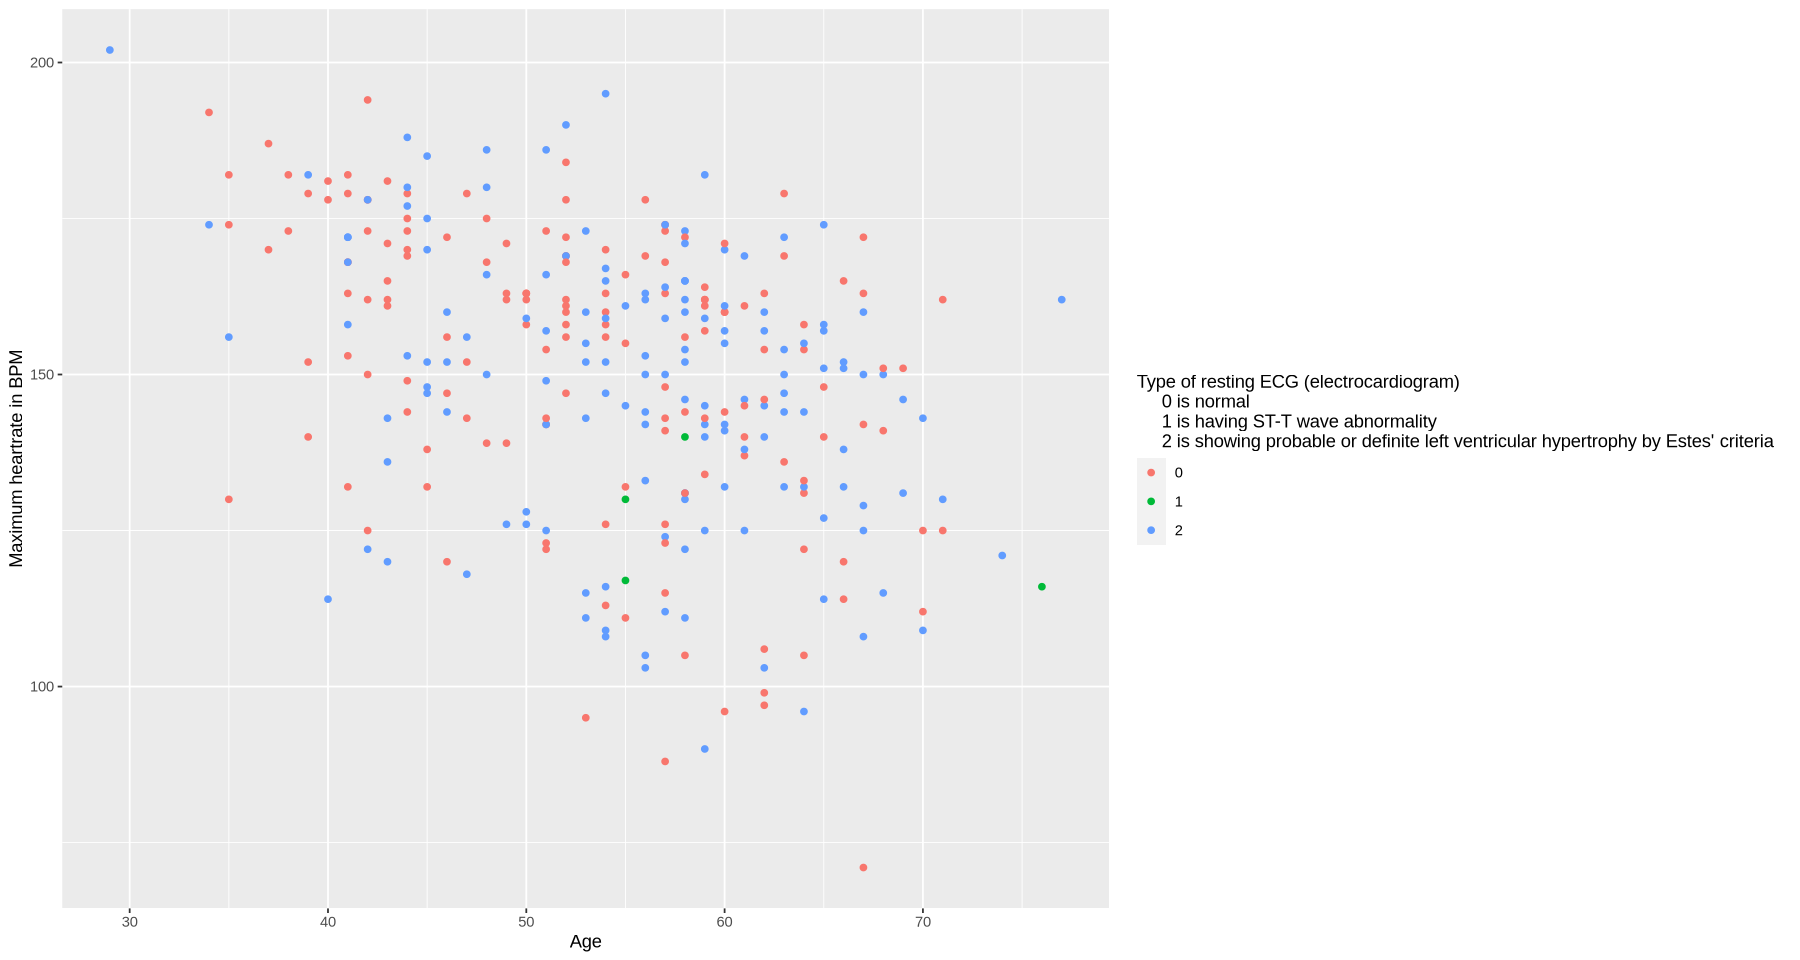

In [24]:
age_max_hr_rest_ecg_plot <- cleveland |>
ggplot(aes(x = age, y = max_hr, fill = as_factor(rest_ecg))) +
geom_point(aes(color = as_factor(rest_ecg))) +
labs(x = "Age", y = "Maximum heartrate in BPM", color = "Type of resting ECG (electrocardiogram)
     0 is normal
     1 is having ST-T wave abnormality 
     2 is showing probable or definite left ventricular hypertrophy by Estes' criteria") +
guides(fill = "none") 
age_max_hr_rest_ecg_plot

In [17]:
#Once again, no real distinction between resting ecg and max heart rate